In [6]:
%pip install numpy 
%pip install pandas 
%pip install tensorflow
%pip install matplotlib
%pip install scikit-learn
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import pandas as pd

In [8]:
Training_data = pd.read_csv("C:/Users/anshi/Downloads/eGeMAPS/eGeMAPS/train.csv",sep=';')
Training_data = Training_data.drop(['name', 'frameTime'], axis=1)

Development_data = pd.read_csv("C:/Users/anshi/Downloads/eGeMAPS/eGeMAPS/devel.csv",sep=';')
Development_data = Development_data.drop(['name', 'frameTime'], axis=1)

Test_data = pd.read_csv("C:/Users/anshi/Downloads/eGeMAPS/eGeMAPS/test.csv",sep=';')
Test_data = Test_data.drop(['name', 'frameTime'], axis=1)

In [9]:
Training_data

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,31.81426,0.077831,29.45651,31.62604,32.61879,3.162279,42.34615,58.078150,73.180730,131.879000,...,0.048759,-0.003740,0.484762,4.494382,2.265372,0.343571,0.249989,0.072000,0.048470,-19.03670
1,24.46732,0.045861,23.45910,24.74364,25.40823,1.949127,60.58834,78.845210,21.694370,13.711370,...,-0.015707,-0.012927,0.652902,4.687500,2.483070,0.167273,0.152678,0.196667,0.202909,-14.49738
2,33.26878,0.061010,32.33030,33.31224,34.01599,1.685688,39.23673,32.147710,95.287870,137.569700,...,0.046003,-0.010022,0.402764,5.357143,1.808786,0.370000,0.275266,0.141250,0.081768,-18.75154
3,22.69459,0.104996,20.27642,22.05853,25.07660,4.800186,23.80389,12.939010,8.484975,4.904509,...,0.031161,0.001119,0.222495,2.658487,3.305785,0.140625,0.125223,0.132941,0.138129,-23.24108
4,37.33189,0.069809,35.94787,37.23547,39.81235,3.864483,22.88432,1.270972,33.298340,28.741900,...,0.021344,-0.003438,0.225425,2.762431,2.240896,0.218750,0.108563,0.205000,0.257827,-18.93022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9500,23.44724,0.062946,21.80935,23.89803,24.84353,3.034182,29.94075,34.074020,9.535667,7.131151,...,-0.029210,-0.005883,0.952345,5.220417,2.567095,0.194546,0.229203,0.166957,0.166353,-13.88655
9501,28.58082,0.063252,27.21174,27.98597,30.81147,3.599726,18.89085,12.457170,16.908710,7.675679,...,0.005841,0.003036,0.223865,3.636364,1.428571,0.335714,0.161763,0.300000,0.293981,-19.12324
9502,37.12837,0.045501,35.61171,36.86778,38.83109,3.219372,14.37324,7.653820,2.743728,13.007360,...,0.060100,-0.008190,0.221447,2.717391,1.928375,0.330000,0.439708,0.146250,0.087169,-19.44169
9503,24.86159,0.127942,23.56765,25.34627,27.34624,3.778585,22.99618,13.721890,40.141240,31.707850,...,0.023628,-0.014414,1.238817,6.169666,3.125000,0.132500,0.123026,0.165833,0.116007,-13.06414


In [856]:
X_train = Training_data.values
X_devel = Development_data.values
X_test = Test_data.values

print(X_train.shape)
print(X_devel.shape)
print(X_test.shape)

(9505, 88)
(9596, 88)
(9551, 88)


In [857]:
Training_labels = pd.read_csv("C:/Users/anshi/Downloads/eGeMAPS/Labels/train.csv")
Training_labels = Training_labels.drop(['file_name'], axis=1)

Development_labels = pd.read_csv("C:/Users/anshi/Downloads/eGeMAPS/Labels/devel.csv")
Development_labels = Development_labels.drop(['file_name'], axis=1)

In [20]:
Training_labels

,Cold (upper respiratory tract infection)
0,C
1,NC
2,NC
3,C
4,NC
...,...
9500,NC
9501,C
9502,NC
9503,NC


In [858]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(['C', 'NC'])
y_train = le.transform(np.ravel(Training_labels))
y_devel = le.transform(np.ravel(Development_labels))

print(y_train.shape)
print(y_devel.shape)

(9505,)
(9596,)


normalised data is less sensitive to outliers which are apparently plenty in this dataset (as can be seen in the plot below)

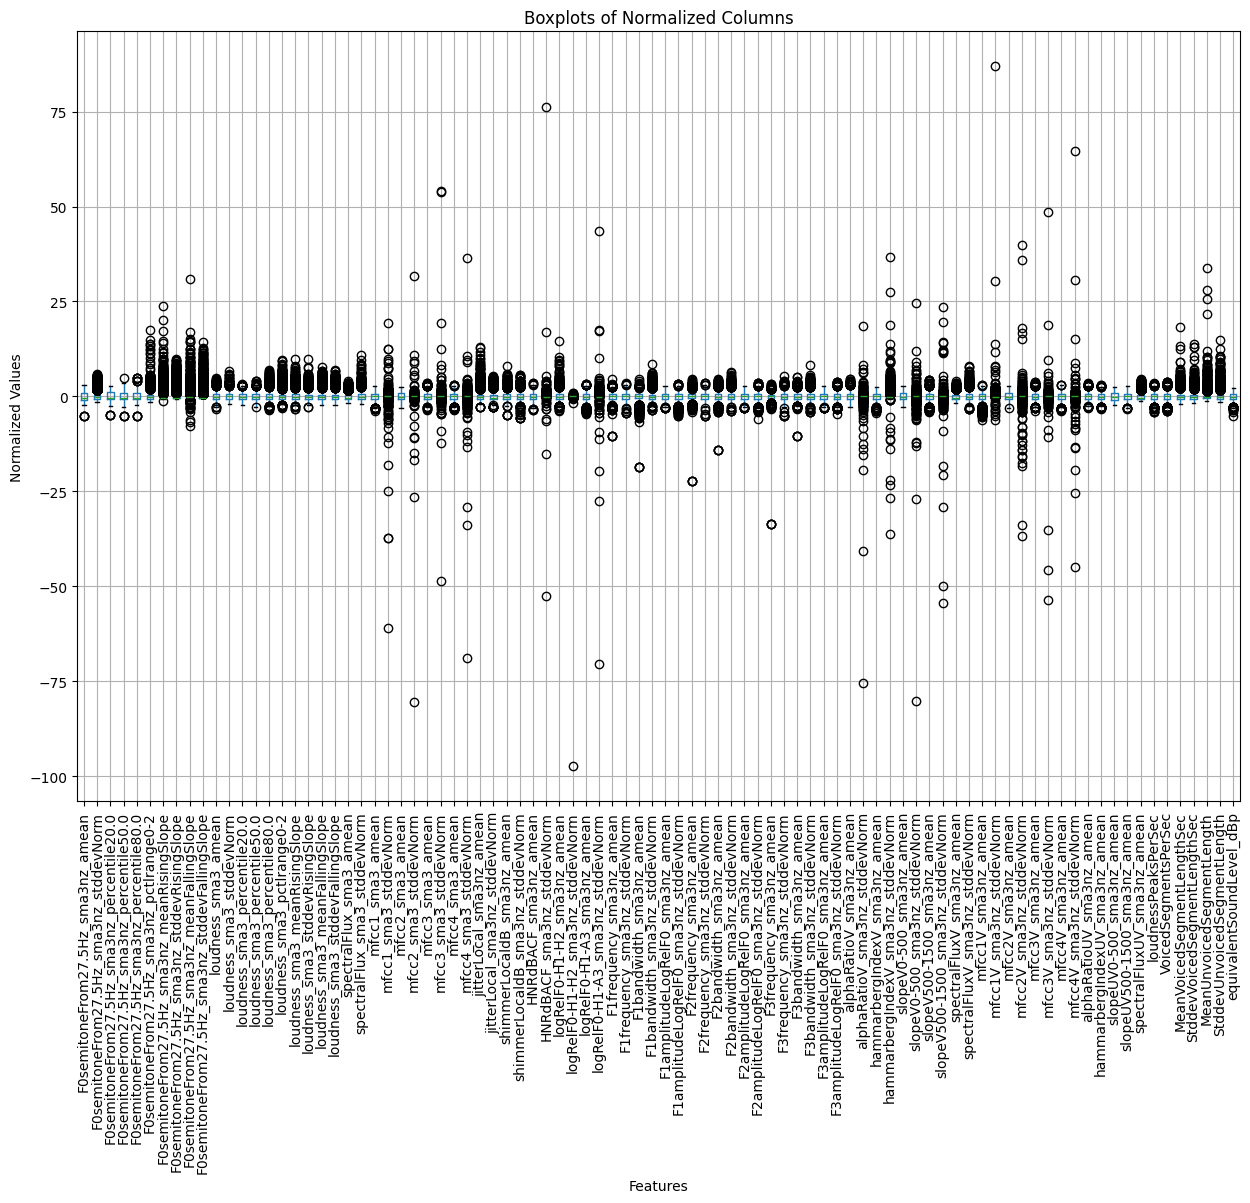

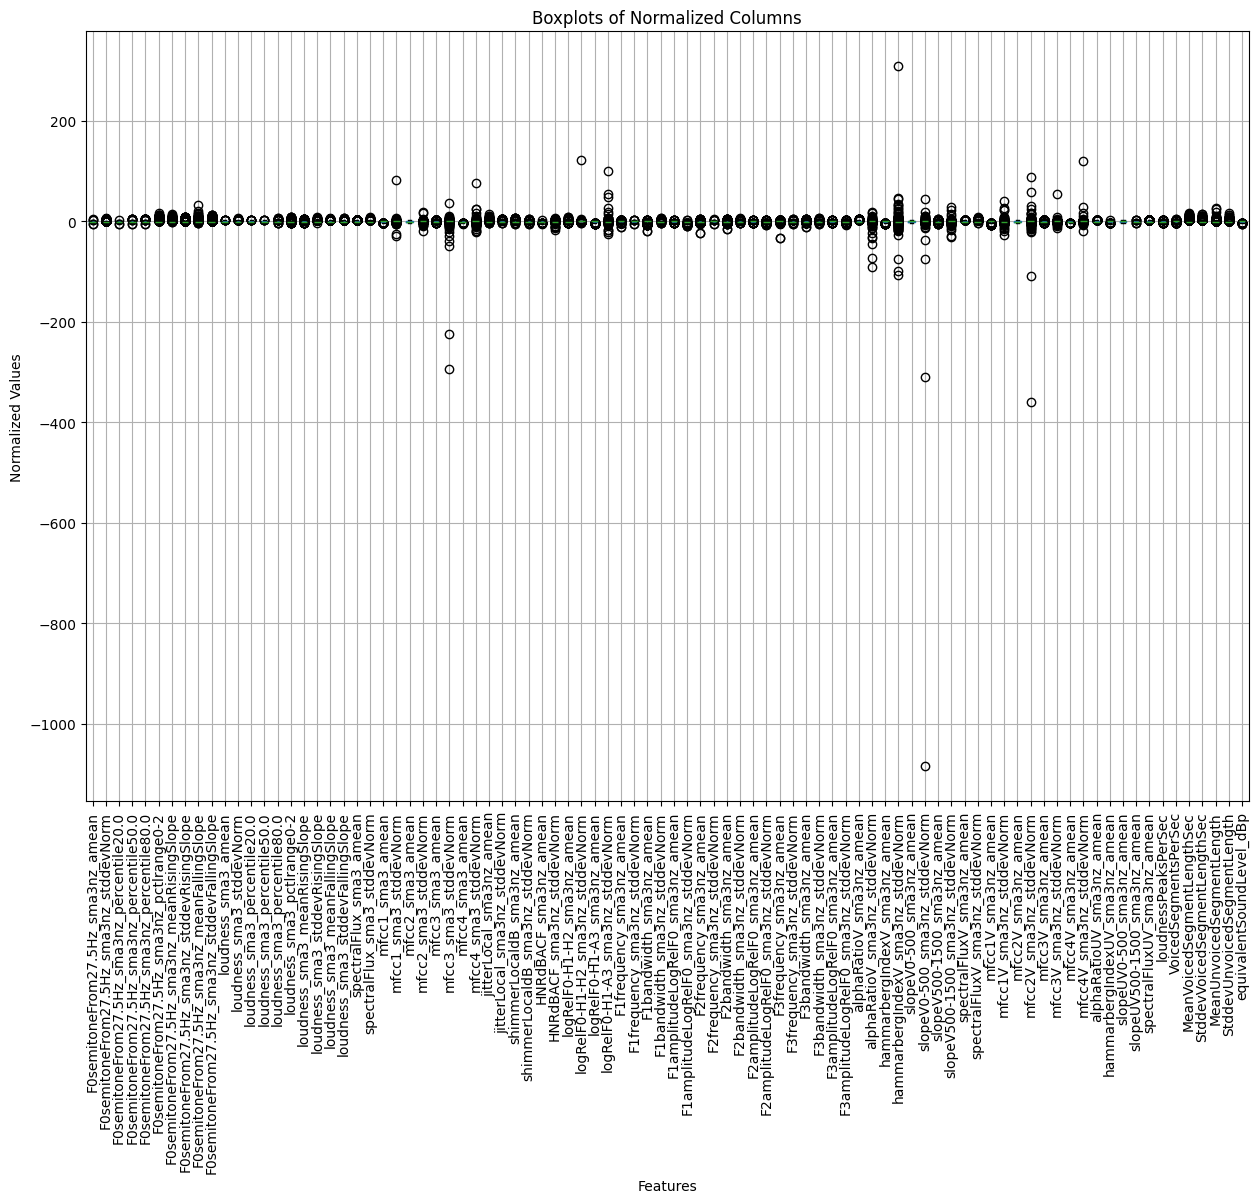

In [859]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


#  Normalising the columns
scaler = StandardScaler()
normalized_training = scaler.fit_transform(Training_data)
normalized_dev = scaler.transform(Development_data)

# Convert the normalised data back to a DataFrame
normalized_training_data = pd.DataFrame(normalized_training, columns=Training_data.columns)
normalized_dev_data = pd.DataFrame(normalized_dev, columns=Development_data.columns)

#Create boxplots for each column
plt.figure(figsize=(15, 10))
normalized_training_data.boxplot()
plt.title('Boxplots of Normalized Columns')
plt.xticks(rotation=90) 
plt.xlabel('Features')
plt.ylabel('Normalized Values')
plt.show()



plt.figure(figsize=(15, 10)) 
normalized_dev_data.boxplot()
plt.title('Boxplots of Normalized Columns')
plt.xticks(rotation=90)  
plt.xlabel('Features')
plt.ylabel('Normalized Values')
plt.show()



In [212]:
normalized_training_data

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,0.637942,-0.426642,0.551598,0.642389,0.434495,-0.203200,-0.358166,-0.274794,0.116504,0.468026,...,1.178112,-0.421185,0.257708,0.322639,-0.490505,1.490454,1.145050,-0.862528,-1.017710,0.295049
1,-0.730215,-0.880732,-0.559275,-0.619095,-0.812769,-0.732055,-0.253901,-0.172976,-0.314291,-0.374560,...,-0.781990,-1.614182,0.827904,0.524124,-0.157383,-0.280773,0.005029,0.047414,0.245059,1.314233
2,0.908805,-0.665564,1.083897,0.951455,0.676178,-0.846898,-0.375938,-0.401928,0.301478,0.508603,...,1.094323,-1.236966,-0.020365,1.222779,-1.189174,1.755975,1.441182,-0.357072,-0.745453,0.359074
3,-1.060335,-0.040795,-1.148788,-1.111253,-0.870133,0.510821,-0.464147,-0.496106,-0.424816,-0.437357,...,0.643031,0.209816,-0.631692,-1.592795,1.101537,-0.548495,-0.316619,-0.417718,-0.284616,-0.648932
4,1.665443,-0.540590,1.753962,1.670549,1.678817,0.102915,-0.469402,-0.553313,-0.217199,-0.267386,...,0.344552,-0.381987,-0.621756,-1.484348,-0.527958,0.236406,-0.511798,0.108239,0.694095,0.318956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9500,-0.920175,-0.638068,-0.864850,-0.774088,-0.910449,-0.259042,-0.429071,-0.392484,-0.416025,-0.421480,...,-1.192548,-0.699563,1.843373,1.080130,-0.028808,-0.006770,0.901534,-0.169441,-0.053842,1.451378
9501,0.035807,-0.633722,0.135809,-0.024804,0.121869,-0.012502,-0.492228,-0.498469,-0.354333,-0.417597,...,-0.126834,0.458699,-0.627047,-0.572552,-1.770980,1.411516,0.111460,0.801644,0.989705,0.275619
9502,1.627543,-0.885848,1.691697,1.603155,1.509082,-0.178311,-0.518049,-0.522019,-0.472854,-0.379580,...,1.522930,-0.999061,-0.635245,-1.531339,-1.006179,1.354106,3.367668,-0.320577,-0.701288,0.204119
9503,-0.656793,0.285139,-0.539169,-0.508638,-0.477537,0.065469,-0.468763,-0.492268,-0.159943,-0.246238,...,0.413991,-1.807317,2.814859,2.070505,0.824899,-0.630125,-0.342359,-0.177639,-0.465495,1.636028


over-sampling takes observed rare samples and applies bootstrapping to generate new random data based on a distribution function. If cross-validation is applied after over-sampling, basically what we are doing is overfitting our model to a specific artificial bootstrapping result. That is why cross-validation should always be done before over-sampling the data

my reference: https://www.kdnuggets.com/2017/06/7-techniques-handle-imbalanced-data.html

Steps in the SVM Workflow:

Step 1: Original training data is used for hyperparameter tuning to find the best model configuration (best hyperparameters).

Step 2: Once optimal hyperparameters are determined, the model is trained again from scratch on the balanced training data (after applying data balancing techniques).

Step 3: Evaluation is then performed on development set to assess how well the model generalizes to unseen data. ive not applied balancing techniques to development set, maintaining the original distribution of classes. 

In [344]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, make_scorer
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN


 RBF SVM has best macro/unweighted avg accuracy of 61%, indicating that the a non-linear kernel captured patterns in the data better than linear kernels, suggesting existing non-linear relationships in data. now we shall conduct hyperparameter optimisation through cross-validation using UAR as performance metric. 

## SVM

In [223]:
# Define SVM classifier
svm = SVC()


# Hyperparameter grid
param_grid = {
    'C': [0.001, 0.1, 1],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'rbf'],  # Kernel type
   
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, scoring='balanced_accuracy', verbose=1, n_jobs=-1)
grid_search.fit(normalized_training_data, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best weighted accuracy score:", grid_search.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best weighted accuracy score: 0.643199958325348


testing final but unbalanced model on dev data 

In [860]:
unbal_model = grid_search.best_estimator_

y_predicted = unbal_model.predict(normalized_dev_data)
print(" Classification report of the model: ")
print(classification_report(y_devel,y_predicted))

 Classification report of the model: 
              precision    recall  f1-score   support

           0       0.58      0.09      0.16      1011
           1       0.90      0.99      0.95      8585

    accuracy                           0.90      9596
   macro avg       0.74      0.54      0.55      9596
weighted avg       0.87      0.90      0.86      9596



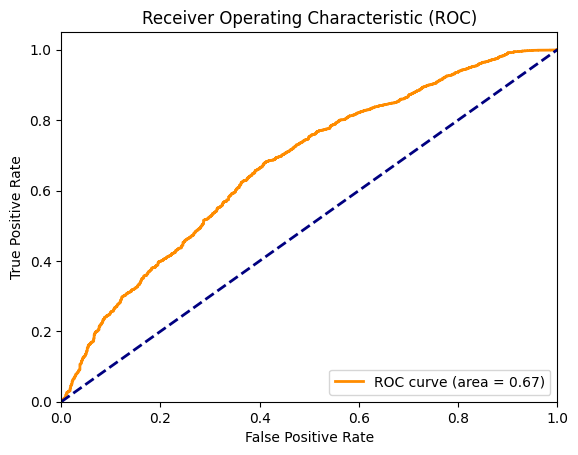

0.9796682635835678
 Classification report of the model: 
              precision    recall  f1-score   support

           0       0.21      0.44      0.28      1011
           1       0.92      0.80      0.86      8585

    accuracy                           0.76      9596
   macro avg       0.56      0.62      0.57      9596
weighted avg       0.85      0.76      0.80      9596



In [861]:
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import recall_score


if hasattr(unbal_model, "predict_proba"):
    y_pred_prob = unbal_model.predict_proba(normalized_dev_data)[:, 0]  
else:
    y_pred_prob = unbal_model.decision_function(normalized_dev_data)  

# Step 3: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_devel, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Step 4: Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


best_threshold = None
best_recall_macro = -1.0

for threshold in thresholds:
    if threshold >= 0 and threshold <= 1:
        y_pred_thresholded = (y_pred_prob >= threshold).astype(int)
        recall_macro = recall_score(y_devel, y_pred_thresholded, average='macro')
        
        if recall_macro > best_recall_macro:
            best_recall_macro = recall_macro
            best_threshold = threshold


print(best_threshold)

# Step 6: Apply the optimal threshold to make predictions
y_pred_optimal = (y_pred_prob > best_threshold).astype(int)
print(" Classification report of the model: ")
print(classification_report(y_devel,y_pred_optimal))

we can be attribute low performance to class imbalance. moreover, selection of rbf over linear kernal indicates that perhaps data is not linearly separable.
We will now train the same SVM classifier using three different techniques for handling class imbalance, and choose the best performer as the final classifier.
We will use cross validation for training only then test our classifier on dev data.

class weighting 

In [656]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import recall_score


class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

final_model = SVC(**grid_search.best_params_, class_weight=dict(zip(np.unique(y_train), class_weights)))
final_model.fit(normalized_training_data, y_train)

# Evaluate on the development set
y_pred = final_model.predict(normalized_dev_data)
print(" Classification report of the model: ")
print(classification_report(y_devel,y_pred))

 Classification report of the model: 
              precision    recall  f1-score   support

           0       0.22      0.30      0.25      1011
           1       0.91      0.88      0.89      8585

    accuracy                           0.82      9596
   macro avg       0.57      0.59      0.57      9596
weighted avg       0.84      0.82      0.83      9596



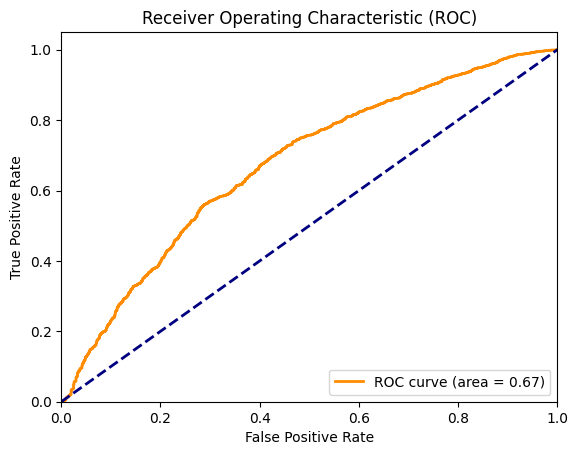

0.6370276561819047
 Classification report of the model: 
              precision    recall  f1-score   support

           0       0.18      0.58      0.28      1011
           1       0.93      0.70      0.80      8585

    accuracy                           0.68      9596
   macro avg       0.56      0.64      0.54      9596
weighted avg       0.85      0.68      0.74      9596



In [863]:
from sklearn.metrics import roc_curve, auc 

# Step 2: Predict probabilities or decision function values for validation set
if hasattr(final_model, "predict_proba"):
    y_pred_prob = final_model.predict_proba(normalized_dev_data)[:, 0]  # Probability of the positive class
else:
    y_pred_prob = final_model.decision_function(normalized_dev_data)  # Decision function values (to be calibrated)

# Step 3: Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_devel, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Step 4: Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


best_threshold = None
best_recall_macro = -1.0

for threshold in thresholds:
    y_pred_thresholded = (y_pred_prob >= threshold).astype(int)
    recall_macro = recall_score(y_devel, y_pred_thresholded, average='macro')
    
    if recall_macro > best_recall_macro:
        best_recall_macro = recall_macro
        best_threshold = threshold


print(best_threshold)


# Step 6: Apply the optimal threshold to make predictions
y_pred_optimal = (y_pred_prob > best_threshold).astype(int)
print(" Classification report of the model: ")
print(classification_report(y_devel,y_pred_optimal))

SMOTE 

In [864]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(normalized_training_data, y_train)

In [865]:
from collections import Counter

counter = Counter(y_train_smote)
print(counter)

Counter({0: 8535, 1: 8535})


In [866]:
final_model = SVC(**grid_search.best_params_)
final_model.fit(X_train_smote, y_train_smote)

#Evaluate on the development set
y_pred = final_model.predict(normalized_dev_data)
print(" Classification report of the model: ")
print(classification_report(y_devel,y_pred))

 Classification report of the model: 
              precision    recall  f1-score   support

           0       0.24      0.23      0.23      1011
           1       0.91      0.92      0.91      8585

    accuracy                           0.84      9596
   macro avg       0.58      0.57      0.57      9596
weighted avg       0.84      0.84      0.84      9596



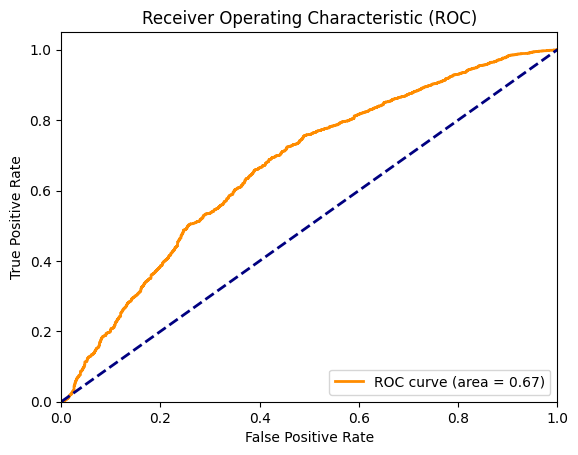

0.894147824246647
 Classification report of the model: 
              precision    recall  f1-score   support

           0       0.18      0.58      0.27      1011
           1       0.93      0.69      0.79      8585

    accuracy                           0.68      9596
   macro avg       0.56      0.63      0.53      9596
weighted avg       0.85      0.68      0.74      9596



In [867]:
from sklearn.metrics import roc_curve, auc 

if hasattr(final_model, "predict_proba"):
    y_pred_prob = final_model.predict_proba(normalized_dev_data)[:, 0]  
else:
    y_pred_prob = final_model.decision_function(normalized_dev_data) 

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_devel, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


best_threshold = None
best_recall_macro = -1.0

for threshold in thresholds:
    y_pred_thresholded = (y_pred_prob >= threshold).astype(int)
    recall_macro = recall_score(y_devel, y_pred_thresholded, average='macro')
    
    if recall_macro > best_recall_macro:
        best_recall_macro = recall_macro
        best_threshold = threshold


print(best_threshold)

#Apply the optimal threshold to make predictions
y_pred_optimal = (y_pred_prob > best_threshold).astype(int)
print(" Classification report of the model: ")
print(classification_report(y_devel,y_pred_optimal))


ADASYN 

In [868]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_train_ad, y_train_ad = adasyn.fit_resample(normalized_training_data, y_train)

In [869]:

final_model = SVC(**grid_search.best_params_)
final_model.fit(X_train_ad, y_train_ad)

# Evaluate on the validation set
y_pred = final_model.predict(normalized_dev_data)
print(" Classification report of the model: ")
print(classification_report(y_devel,y_pred))

 Classification report of the model: 
              precision    recall  f1-score   support

           0       0.24      0.26      0.25      1011
           1       0.91      0.90      0.91      8585

    accuracy                           0.83      9596
   macro avg       0.57      0.58      0.58      9596
weighted avg       0.84      0.83      0.84      9596



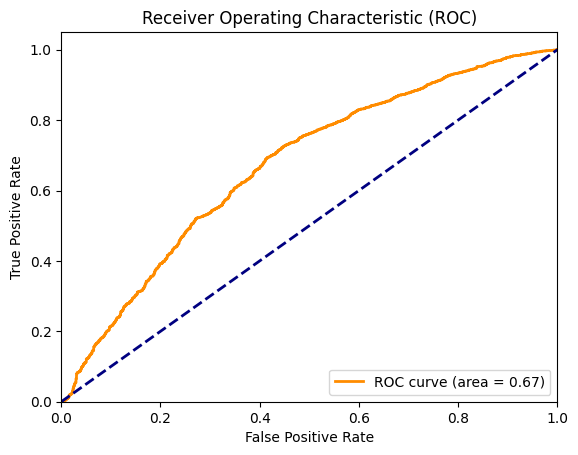

0.8135299160482402
 Classification report of the model: 
              precision    recall  f1-score   support

           0       0.18      0.58      0.28      1011
           1       0.93      0.69      0.80      8585

    accuracy                           0.68      9596
   macro avg       0.56      0.64      0.54      9596
weighted avg       0.86      0.68      0.74      9596



In [870]:
from sklearn.metrics import roc_curve, auc 

if hasattr(final_model, "predict_proba"):
    y_pred_prob = final_model.predict_proba(normalized_dev_data)[:, 0]  
else:
    y_pred_prob = final_model.decision_function(normalized_dev_data)  

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_devel, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


best_threshold = None
best_recall_macro = -1.0

for threshold in thresholds:
    y_pred_thresholded = (y_pred_prob >= threshold).astype(int)
    recall_macro = recall_score(y_devel, y_pred_thresholded, average='macro')
    
    if recall_macro > best_recall_macro:
        best_recall_macro = recall_macro
        best_threshold = threshold


print(best_threshold)

#Apply the optimal threshold to make predictions
y_pred_optimal = (y_pred_prob > best_threshold).astype(int)
print(" Classification report of the model: ")
print(classification_report(y_devel,y_pred_optimal))




## ANN

In [ ]:
pip install tensorflow

In [365]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import tensorflow as tf

def create_model(hidden_layers, activation, optimizer, dropout_rate):
    model = Sequential()
    model.add(Dense(hidden_layers[0], input_dim=88, activation=activation))
    
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation=activation))
        if dropout_rate > 0.0:
            model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    
    if optimizer == 'adam':
        optimizer = Adam()
    elif optimizer == 'rmsprop':
        optimizer = RMSprop()
  

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.F1Score(name='f1_score', average='macro')])
    return model

here I am splitting the training data into training and validation set. this validation set will be used to determine optimal hyperparameters. the original development set will be used for final evaluation. 

In [871]:
X_train, X_val, y_train, y_val = train_test_split(normalized_training_data, y_train, test_size=0.2, random_state=42)


In [227]:
#  configurations
hidden_layers_variants = [[64, 32], [128, 64, 32], [256, 128, 64]]
activations = ['relu', 'tanh']
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.0, 0.2]

# Reshapeing y_train and y_devel
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

# Store the results
results = []

for hidden_layers in hidden_layers_variants:
    for activation in activations:
        for optimizer in optimizers:
            for dropout_rate in dropout_rates:
                print(f'Training with {hidden_layers}, activation={activation}, optimizer={optimizer}, dropout_rate={dropout_rate}')
                model = create_model(hidden_layers=hidden_layers, activation=activation, optimizer=optimizer, dropout_rate=dropout_rate)
                history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)
                
                val_f1 = history.history['val_f1_score'][-1]
                results.append((hidden_layers, activation, optimizer, dropout_rate, val_f1))

# Finding the best configuration
best_config = max(results, key=lambda x: x[4])
print(f'Best configuration: Hidden Layers={best_config[0]}, Activation={best_config[1]}, Optimizer={best_config[2]}, Dropout Rate={best_config[3]}, Validation F1-Score={best_config[4]}')


Training with [64, 32], activation=relu, optimizer=adam, dropout_rate=0.0


c:\Users\anshi\Downloads\eGeMAPS\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with [64, 32], activation=relu, optimizer=adam, dropout_rate=0.2
Training with [64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.0
Training with [64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.2
Training with [64, 32], activation=tanh, optimizer=adam, dropout_rate=0.0
Training with [64, 32], activation=tanh, optimizer=adam, dropout_rate=0.2
Training with [64, 32], activation=tanh, optimizer=rmsprop, dropout_rate=0.0
Training with [64, 32], activation=tanh, optimizer=rmsprop, dropout_rate=0.2
Training with [128, 64, 32], activation=relu, optimizer=adam, dropout_rate=0.0
Training with [128, 64, 32], activation=relu, optimizer=adam, dropout_rate=0.2
Training with [128, 64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.0
Training with [128, 64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.2
Training with [128, 64, 32], activation=tanh, optimizer=adam, dropout_rate=0.0
Training with [128, 64, 32], activation=tanh, optimizer=adam, dropout

In [873]:
# Create the final model with the best configuration
best_model = create_model(hidden_layers=best_config[0], activation=best_config[1], optimizer=best_config[2], dropout_rate=best_config[3])
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
X= np.concatenate((X_train, X_val), axis=0)
y= np.concatenate((y_train, y_val), axis=0)
# Train the best model on the entire training set
best_model.fit(X, y, epochs=20, batch_size=32, verbose=0)

# Predict on the test set
y_pred = (best_model.predict(normalized_dev_data) > 0.5).astype(int)
accuracy = accuracy_score(y_devel, y_pred)
print(f'Test set accuracy: {accuracy}')

print(classification_report(y_devel, y_pred))

c:\Users\anshi\Downloads\eGeMAPS\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step
Test set accuracy: 0.873905794080867
              precision    recall  f1-score   support

           0       0.30      0.15      0.20      1011
           1       0.91      0.96      0.93      8585

    accuracy                           0.87      9596
   macro avg       0.60      0.55      0.56      9596
weighted avg       0.84      0.87      0.85      9596



300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step


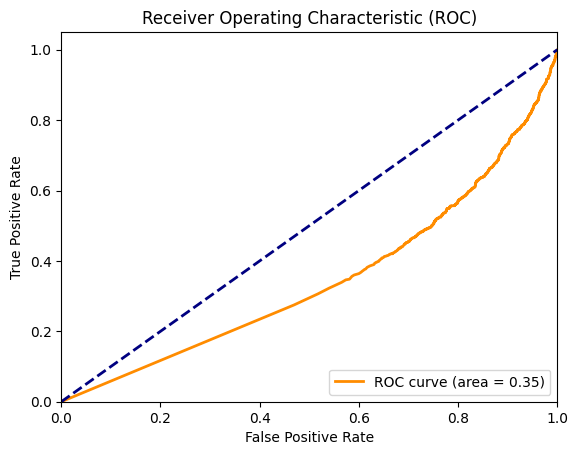

0.9999741
 Classification report of the model: 
              precision    recall  f1-score   support

           0       0.19      0.50      0.27      1011
           1       0.93      0.74      0.83      8585

    accuracy                           0.72      9596
   macro avg       0.56      0.62      0.55      9596
weighted avg       0.85      0.72      0.77      9596



In [874]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = (best_model.predict(normalized_dev_data))
fpr, tpr, thresholds = roc_curve(y_devel, y_pred_prob, pos_label=0)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

best_threshold = None
best_recall_macro = -1.0

for threshold in thresholds:
    y_pred_thresholded = (y_pred_prob >= threshold).astype(int)
    recall_macro = recall_score(y_devel, y_pred_thresholded, average='macro')
    
    if recall_macro > best_recall_macro:
        best_recall_macro = recall_macro
        best_threshold = threshold


print(best_threshold)

# Apply the optimal threshold to make predictions
y_pred_optimal = (y_pred_prob > best_threshold).astype(int)
print(" Classification report of the model: ")
print(classification_report(y_devel,y_pred_optimal))

In [507]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train.ravel())
class_weights_dict = dict(enumerate(class_weights))

#  configurations
hidden_layers_variants = [[64, 32], [128, 64, 32], [256, 128, 64]]
activations = ['relu', 'tanh']
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.0, 0.2]

# Reshapeing y_train and y_devel
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

# Store the results
results = []

for hidden_layers in hidden_layers_variants:
    for activation in activations:
        for optimizer in optimizers:
            for dropout_rate in dropout_rates:
                print(f'Training with {hidden_layers}, activation={activation}, optimizer={optimizer}, dropout_rate={dropout_rate}')
                model = create_model(hidden_layers=hidden_layers, activation=activation, optimizer=optimizer, dropout_rate=dropout_rate)
                history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), class_weight=class_weights_dict, verbose=0)
                
                val_f1 = history.history['val_f1_score'][-1]
                results.append((hidden_layers, activation, optimizer, dropout_rate, val_f1))

# Finding the best configuration
best_config = max(results, key=lambda x: x[4])
print(f'Best configuration: Hidden Layers={best_config[0]}, Activation={best_config[1]}, Optimizer={best_config[2]}, Dropout Rate={best_config[3]}, Validation F1-Score={best_config[4]}')


Training with [64, 32], activation=relu, optimizer=adam, dropout_rate=0.0


c:\Users\anshi\Downloads\eGeMAPS\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with [64, 32], activation=relu, optimizer=adam, dropout_rate=0.2
Training with [64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.0
Training with [64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.2
Training with [64, 32], activation=tanh, optimizer=adam, dropout_rate=0.0
Training with [64, 32], activation=tanh, optimizer=adam, dropout_rate=0.2
Training with [64, 32], activation=tanh, optimizer=rmsprop, dropout_rate=0.0
Training with [64, 32], activation=tanh, optimizer=rmsprop, dropout_rate=0.2
Training with [128, 64, 32], activation=relu, optimizer=adam, dropout_rate=0.0
Training with [128, 64, 32], activation=relu, optimizer=adam, dropout_rate=0.2
Training with [128, 64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.0
Training with [128, 64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.2
Training with [128, 64, 32], activation=tanh, optimizer=adam, dropout_rate=0.0
Training with [128, 64, 32], activation=tanh, optimizer=adam, dropout

In [875]:
# Create the final model with the best configuration
best_model = create_model(hidden_layers=best_config[0], activation=best_config[1], optimizer=best_config[2], dropout_rate=best_config[3])
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

X= np.concatenate((X_train, X_val), axis=0)
y= np.concatenate((y_train, y_val), axis=0)
# Train the best model on the entire training set
best_model.fit(X, y, epochs=20, batch_size=32, verbose=0)

# Predict on the test set
y_pred = (best_model.predict(normalized_dev_data) > 0.5).astype(int)
accuracy = accuracy_score(y_devel, y_pred)
print(f'Test set accuracy: {accuracy}')

print(classification_report(y_devel, y_pred))

c:\Users\anshi\Downloads\eGeMAPS\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 949us/step
Test set accuracy: 0.8678616090037515
              precision    recall  f1-score   support

           0       0.29      0.18      0.22      1011
           1       0.91      0.95      0.93      8585

    accuracy                           0.87      9596
   macro avg       0.60      0.56      0.58      9596
weighted avg       0.84      0.87      0.85      9596



300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step


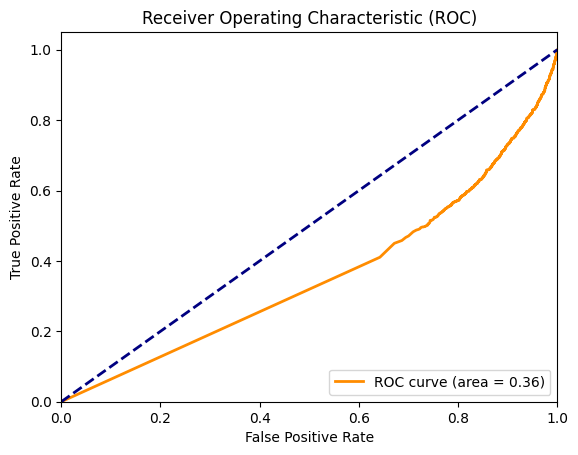

0.99999887 0.6187102040628221
 Classification report of the model: 
              precision    recall  f1-score   support

           0       0.18      0.50      0.27      1011
           1       0.93      0.74      0.82      8585

    accuracy                           0.71      9596
   macro avg       0.55      0.62      0.54      9596
weighted avg       0.85      0.71      0.76      9596



In [876]:
from sklearn.metrics import roc_curve, auc


y_pred_prob = (best_model.predict(normalized_dev_data))
fpr, tpr, thresholds = roc_curve(y_devel, y_pred_prob, pos_label=0)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

best_threshold = None
best_recall_macro = -1.0

for threshold in thresholds:
    y_pred_thresholded = (y_pred_prob >= threshold).astype(int)
    recall_macro = recall_score(y_devel, y_pred_thresholded, average='macro')
    
    if recall_macro > best_recall_macro:
        best_recall_macro = recall_macro
        best_threshold = threshold


print(best_threshold, best_recall_macro)

y_pred_optimal = (y_pred_prob > best_threshold).astype(int)
print(" Classification report of the model: ")
print(classification_report(y_devel,y_pred_optimal))

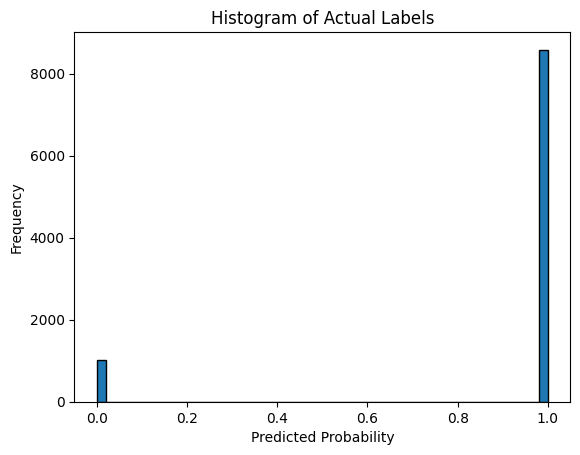

In [886]:
plt.hist(y_devel, bins=50, edgecolor='k')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Labels')
plt.show()

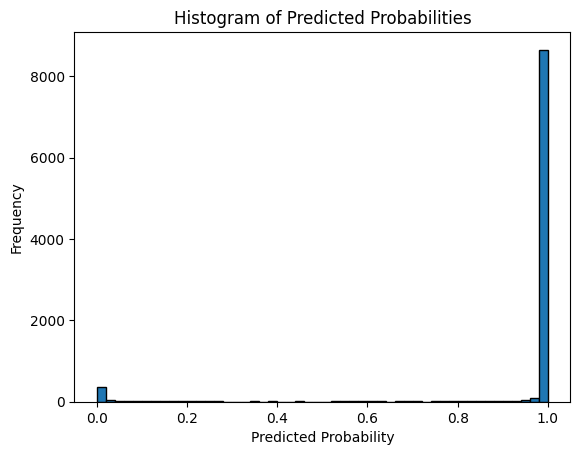

In [887]:
plt.hist(y_pred_prob, bins=50, edgecolor='k')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

I am now applying over--sampling techniques. i only applied over-sampling to the training data post training-validation split.  

In [877]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote = y_train_smote.reshape(-1, 1)


In [232]:


#  configurations
hidden_layers_variants = [[64, 32], [128, 64, 32], [256, 128, 64]]
activations = ['relu', 'tanh']
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.0, 0.2]

# Reshapeing y_train and y_devel
y_train_smote = y_train_smote.reshape(-1, 1)

# Store the results
results = []

for hidden_layers in hidden_layers_variants:
    for activation in activations:
        for optimizer in optimizers:
            for dropout_rate in dropout_rates:
                print(f'Training with {hidden_layers}, activation={activation}, optimizer={optimizer}, dropout_rate={dropout_rate}')
                model = create_model(hidden_layers=hidden_layers, activation=activation, optimizer=optimizer, dropout_rate=dropout_rate)
                history = model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)
                
                val_f1 = history.history['val_f1_score'][-1]
                results.append((hidden_layers, activation, optimizer, dropout_rate, val_f1))

# Finding the best configuration
best_config = max(results, key=lambda x: x[4])
print(f'Best configuration: Hidden Layers={best_config[0]}, Activation={best_config[1]}, Optimizer={best_config[2]}, Dropout Rate={best_config[3]}, Validation F1-Score={best_config[4]}')


Training with [64, 32], activation=relu, optimizer=adam, dropout_rate=0.0


c:\Users\anshi\Downloads\eGeMAPS\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with [64, 32], activation=relu, optimizer=adam, dropout_rate=0.2
Training with [64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.0
Training with [64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.2
Training with [64, 32], activation=tanh, optimizer=adam, dropout_rate=0.0
Training with [64, 32], activation=tanh, optimizer=adam, dropout_rate=0.2
Training with [64, 32], activation=tanh, optimizer=rmsprop, dropout_rate=0.0
Training with [64, 32], activation=tanh, optimizer=rmsprop, dropout_rate=0.2
Training with [128, 64, 32], activation=relu, optimizer=adam, dropout_rate=0.0
Training with [128, 64, 32], activation=relu, optimizer=adam, dropout_rate=0.2
Training with [128, 64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.0
Training with [128, 64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.2
Training with [128, 64, 32], activation=tanh, optimizer=adam, dropout_rate=0.0
Training with [128, 64, 32], activation=tanh, optimizer=adam, dropout

In [878]:
# Create the final model with the best configuration
best_model = create_model(hidden_layers=best_config[0], activation=best_config[1], optimizer=best_config[2], dropout_rate=best_config[3])
X= np.concatenate((X_train_smote, X_val), axis=0)
y= np.concatenate((y_train_smote, y_val), axis=0)
# Train the best model on the entire training set
best_model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=32, verbose=0)

# Predict on the dev set
y_pred = (best_model.predict(normalized_dev_data) > 0.5).astype(int)
accuracy = accuracy_score(y_devel, y_pred)
print(f'Test set accuracy: {accuracy}')

print(classification_report(y_devel, y_pred))

c:\Users\anshi\Downloads\eGeMAPS\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
Test set accuracy: 0.8774489370571071
              precision    recall  f1-score   support

           0       0.34      0.17      0.22      1011
           1       0.91      0.96      0.93      8585

    accuracy                           0.88      9596
   macro avg       0.62      0.56      0.58      9596
weighted avg       0.85      0.88      0.86      9596



300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step


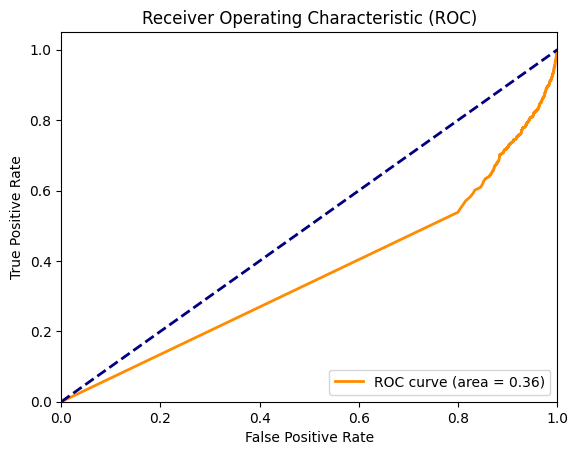

0.99999994
 Classification report of the model: 
              precision    recall  f1-score   support

           0       0.21      0.46      0.29      1011
           1       0.93      0.80      0.86      8585

    accuracy                           0.76      9596
   macro avg       0.57      0.63      0.58      9596
weighted avg       0.85      0.76      0.80      9596



In [881]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = (best_model.predict(normalized_dev_data))
fpr, tpr, thresholds = roc_curve(y_devel, y_pred_prob, pos_label=0)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

best_threshold = None
best_recall_macro = -1.0

for threshold in thresholds:
    if threshold > 0 and threshold < 1:
        y_pred_thresholded = (y_pred_prob >= threshold).astype(int)
        recall_macro = recall_score(y_devel, y_pred_thresholded, average='macro')
        
        if recall_macro > best_recall_macro:
            best_recall_macro = recall_macro
            best_threshold = threshold


print(best_threshold)

# Apply the optimal threshold to make predictions
y_pred_optimal = (y_pred_prob > best_threshold).astype(int)
print(" Classification report of the model: ")
print(classification_report(y_devel,y_pred_optimal))

ADASYN

In [882]:
X_train_ad, y_train_ad = adasyn.fit_resample(X_train, y_train)
y_train_ad = y_train_ad.reshape(-1, 1)



In [235]:
#  configurations
hidden_layers_variants = [[64, 32], [128, 64, 32], [256, 128, 64]]
activations = ['relu', 'tanh']
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.0,0.2]

# Reshapeing y_train and y_devel
y_train_ad = y_train_ad.reshape(-1, 1)

# Store the results
results = []

for hidden_layers in hidden_layers_variants:
    for activation in activations:
        for optimizer in optimizers:
            for dropout_rate in dropout_rates:
                print(f'Training with {hidden_layers}, activation={activation}, optimizer={optimizer}, dropout_rate={dropout_rate}')
                model = create_model(hidden_layers=hidden_layers, activation=activation, optimizer=optimizer, dropout_rate=dropout_rate)
                history = model.fit(X_train_ad, y_train_ad, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)
                
                val_f1 = history.history['val_f1_score'][-1]
                results.append((hidden_layers, activation, optimizer, dropout_rate, val_f1))

# Finding the best configuration
best_config = max(results, key=lambda x: x[4])
print(f'Best configuration: Hidden Layers={best_config[0]}, Activation={best_config[1]}, Optimizer={best_config[2]}, Dropout Rate={best_config[3]}, Validation F1-Score={best_config[4]}')


Training with [64, 32], activation=relu, optimizer=adam, dropout_rate=0.0


c:\Users\anshi\Downloads\eGeMAPS\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with [64, 32], activation=relu, optimizer=adam, dropout_rate=0.2
Training with [64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.0
Training with [64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.2
Training with [64, 32], activation=tanh, optimizer=adam, dropout_rate=0.0
Training with [64, 32], activation=tanh, optimizer=adam, dropout_rate=0.2
Training with [64, 32], activation=tanh, optimizer=rmsprop, dropout_rate=0.0
Training with [64, 32], activation=tanh, optimizer=rmsprop, dropout_rate=0.2
Training with [128, 64, 32], activation=relu, optimizer=adam, dropout_rate=0.0
Training with [128, 64, 32], activation=relu, optimizer=adam, dropout_rate=0.2
Training with [128, 64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.0
Training with [128, 64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.2
Training with [128, 64, 32], activation=tanh, optimizer=adam, dropout_rate=0.0
Training with [128, 64, 32], activation=tanh, optimizer=adam, dropout

In [883]:
# Create the final model with the best configuration
best_model = create_model(hidden_layers=best_config[0], activation=best_config[1], optimizer=best_config[2], dropout_rate=best_config[3])
X= np.concatenate((X_train_ad, X_val), axis=0)
y= np.concatenate((y_train_ad, y_val), axis=0)
# Train the best model on the entire training set
best_model.fit(X, y, epochs=10, batch_size=32, verbose=0)

# Predict on the dev set
y_pred = (best_model.predict(normalized_dev_data) > 0.5).astype(int)
accuracy = accuracy_score(y_devel, y_pred)
print(f'Test set accuracy: {accuracy}')

print(classification_report(y_devel, y_pred))

c:\Users\anshi\Downloads\eGeMAPS\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
Test set accuracy: 0.8691121300541892
              precision    recall  f1-score   support

           0       0.29      0.17      0.21      1011
           1       0.91      0.95      0.93      8585

    accuracy                           0.87      9596
   macro avg       0.60      0.56      0.57      9596
weighted avg       0.84      0.87      0.85      9596



300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step
0.3502053993145867


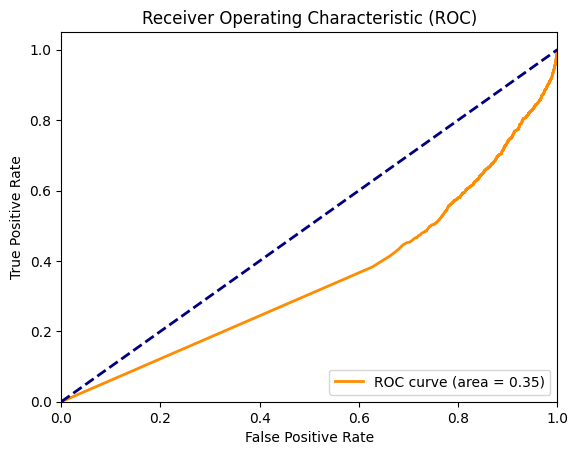

0.99999887
 Classification report of the model: 
              precision    recall  f1-score   support

           0       0.19      0.52      0.27      1011
           1       0.93      0.73      0.82      8585

    accuracy                           0.71      9596
   macro avg       0.56      0.62      0.55      9596
weighted avg       0.85      0.71      0.76      9596



In [884]:

y_pred_prob = (best_model.predict(normalized_dev_data))
fpr, tpr, thresholds = roc_curve(y_devel, y_pred_prob, pos_label=0)
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

best_threshold = None
best_recall_macro = -1.0

for threshold in thresholds:
    if threshold > 0 and threshold < 1:
        y_pred_thresholded = (y_pred_prob >= threshold).astype(int)
        recall_macro = recall_score(y_devel, y_pred_thresholded, average='macro')
        
        if recall_macro > best_recall_macro:
            best_recall_macro = recall_macro
            best_threshold = threshold


print(best_threshold)

y_pred_optimal = (y_pred_prob > best_threshold).astype(int)
print(" Classification report of the model: ")
print(classification_report(y_devel,y_pred_optimal))

## CNN


In [241]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow as tf

def create_cnn_model(filters, kernel_size, pool_size, hidden_layers, activation, optimizer, dropout_rate):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation=activation, input_shape=(88, 1)))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Flatten())
    
    for units in hidden_layers:
        model.add(Dense(units, activation=activation))
        if dropout_rate > 0.0:
            model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    
    if optimizer == 'adam':
        optimizer = Adam()
    elif optimizer == 'rmsprop':
        optimizer = RMSprop()
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.F1Score(name='f1_score', average='macro')])
    return model

# Configurations
filters_variants = [32]
kernel_sizes = [3]
pool_sizes = [2]
hidden_layers_variants = [[64, 32], [128, 64]]
activations = ['relu', 'tanh']
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.0, 0.2]

# Reshape y_train and y_val
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
X_train_np = X_train.to_numpy()
X_val_np = X_val.to_numpy()
X_train_reshaped = X_train_np.reshape(-1, 88, 1)
X_val_reshaped = X_val_np.reshape(-1, 88, 1)

# Store the results
results = []

for filters in filters_variants:
    for kernel_size in kernel_sizes:
        for pool_size in pool_sizes:
            for hidden_layers in hidden_layers_variants:
                for activation in activations:
                    for optimizer in optimizers:
                        for dropout_rate in dropout_rates:
                            print(f'Training with filters={filters}, kernel_size={kernel_size}, pool_size={pool_size}, hidden_layers={hidden_layers}, activation={activation}, optimizer={optimizer}, dropout_rate={dropout_rate}')
                            model = create_cnn_model(filters=filters, kernel_size=kernel_size, pool_size=pool_size, hidden_layers=hidden_layers, activation=activation, optimizer=optimizer, dropout_rate=dropout_rate)
                            history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val), verbose=0)
                            
                            val_f1 = history.history['val_f1_score'][-1]
                            results.append((filters, kernel_size, pool_size, hidden_layers, activation, optimizer, dropout_rate, val_f1))

# Finding the best configuration
best_config = max(results, key=lambda x: x[7])
print(f'Best configuration: Filters={best_config[0]}, Kernel Size={best_config[1]}, Pool Size={best_config[2]}, Hidden Layers={best_config[3]}, Activation={best_config[4]}, Optimizer={best_config[5]}, Dropout Rate={best_config[6]}, Validation F1-Score={best_config[7]}')


Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=relu, optimizer=adam, dropout_rate=0.0


c:\Users\anshi\Downloads\eGeMAPS\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=relu, optimizer=adam, dropout_rate=0.2
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.0
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.2
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=tanh, optimizer=adam, dropout_rate=0.0
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=tanh, optimizer=adam, dropout_rate=0.2
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=tanh, optimizer=rmsprop, dropout_rate=0.0
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=tanh, optimizer=rmsprop, dropout_rate=0.2
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[128, 64], activation=re

In [545]:
# Create the final model with the best configuration
best_model = create_cnn_model(filters=best_config[0], kernel_size=best_config[1], pool_size=best_config[2],
                              hidden_layers=best_config[3], activation=best_config[4],
                              optimizer=best_config[5], dropout_rate=best_config[6])



X= np.concatenate((X_train_reshaped, X_val_reshaped), axis=0)
y= np.concatenate((y_train, y_val), axis=0)

best_model.fit(X, y, epochs=10, batch_size=32, verbose=0)



X_dev_np = normalized_dev_data.to_numpy()
y_devel = y_devel.reshape(-1, 1)
X_dev_reshaped = X_dev_np.reshape(-1, 88, 1)

# Predict on the test set
y_pred = (best_model.predict(X_dev_reshaped) > 0.5).astype(int)
accuracy = accuracy_score(y_devel, y_pred)
print(f'Test set accuracy: {accuracy}')

=print(classification_report(y_devel, y_pred))

300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test set accuracy: 0.8834931221342226
              precision    recall  f1-score   support

           0       0.30      0.08      0.13      1011
           1       0.90      0.98      0.94      8585

    accuracy                           0.88      9596
   macro avg       0.60      0.53      0.53      9596
weighted avg       0.84      0.88      0.85      9596



300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step
0.3472264611694194


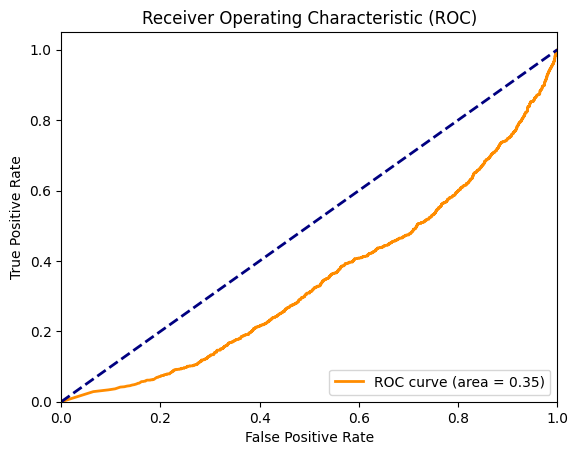

0.99503684
 Classification report of the model: 
              precision    recall  f1-score   support

           0       0.17      0.53      0.26      1011
           1       0.93      0.70      0.80      8585

    accuracy                           0.68      9596
   macro avg       0.55      0.61      0.53      9596
weighted avg       0.85      0.68      0.74      9596



In [549]:
X_dev_np = normalized_dev_data.to_numpy()
y_devel = y_devel.reshape(-1, 1)
X_dev_reshaped = X_dev_np.reshape(-1, 88, 1)

y_pred_prob = (best_model.predict(X_dev_reshaped))
fpr, tpr, thresholds = roc_curve(y_devel, y_pred_prob, pos_label=0)
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

best_threshold = None
best_recall_macro = -1.0


for threshold in thresholds:
    y_pred_thresholded = (y_pred_prob > threshold).astype(int)
    recall_macro = recall_score(y_devel, y_pred_thresholded, average='macro')
    
    if recall_macro > best_recall_macro:
        best_recall_macro = recall_macro
        best_threshold = threshold


print(best_threshold)

y_pred_optimal = (y_pred_prob > best_threshold).astype(int)
print(" Classification report of the model: ")
print(classification_report(y_devel,y_pred_optimal))

In [550]:
y_train.shape

(7604, 1)

In [324]:
from sklearn.utils import class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow as tf

def create_cnn_weight_model(filters, kernel_size, pool_size, hidden_layers, activation, optimizer, dropout_rate):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation=activation, input_shape=(88, 1)))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Flatten())
    
    for units in hidden_layers:
        model.add(Dense(units, activation=activation))
        if dropout_rate > 0.0:
            model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    
    if optimizer == 'adam':
        optimizer = Adam()
    elif optimizer == 'rmsprop':
        optimizer = RMSprop()
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.F1Score(name='f1_score', average='macro')])
    return model

# Configurations
filters_variants = [32]
kernel_sizes = [3]
pool_sizes = [2]
hidden_layers_variants = [[64, 32], [128, 64]]
activations = ['relu', 'tanh']
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.0, 0.2]


# Reshape y_train and y_val
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
X_train_np = X_train.to_numpy()
X_val_np = X_val.to_numpy()
X_train_reshaped = X_train_np.reshape(-1, 88, 1)
X_val_reshaped = X_val_np.reshape(-1, 88, 1)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train.ravel())
class_weights_dict = dict(enumerate(class_weights))



# Store the results
results = []

for filters in filters_variants:
    for kernel_size in kernel_sizes:
        for pool_size in pool_sizes:
            for hidden_layers in hidden_layers_variants:
                for activation in activations:
                    for optimizer in optimizers:
                        for dropout_rate in dropout_rates:
                            print(f'Training with filters={filters}, kernel_size={kernel_size}, pool_size={pool_size}, hidden_layers={hidden_layers}, activation={activation}, optimizer={optimizer}, dropout_rate={dropout_rate}')
                            model = create_cnn_weight_model(filters=filters, kernel_size=kernel_size, pool_size=pool_size, hidden_layers=hidden_layers, activation=activation, optimizer=optimizer, dropout_rate=dropout_rate)
                            history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val), verbose=0, class_weight=class_weights_dict)
                            
                            val_f1 = history.history['val_f1_score'][-1]
                            results.append((filters, kernel_size, pool_size, hidden_layers, activation, optimizer, dropout_rate, val_f1))

# Finding the best configuration
best_config = max(results, key=lambda x: x[7])
print(f'Best configuration: Filters={best_config[0]}, Kernel Size={best_config[1]}, Pool Size={best_config[2]}, Hidden Layers={best_config[3]}, Activation={best_config[4]}, Optimizer={best_config[5]}, Dropout Rate={best_config[6]}, Validation F1-Score={best_config[7]}')


Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=relu, optimizer=adam, dropout_rate=0.0


c:\Users\anshi\Downloads\eGeMAPS\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=relu, optimizer=adam, dropout_rate=0.2
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.0
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.2
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=tanh, optimizer=adam, dropout_rate=0.0
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=tanh, optimizer=adam, dropout_rate=0.2
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=tanh, optimizer=rmsprop, dropout_rate=0.0
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=tanh, optimizer=rmsprop, dropout_rate=0.2
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[128, 64], activation=re

In [551]:
# Create the final model with the best configuration
best_model = create_cnn_weight_model(filters=best_config[0], kernel_size=best_config[1], pool_size=best_config[2],hidden_layers=best_config[3], activation=best_config[4],optimizer=best_config[5], dropout_rate=best_config[6])

best_model=create_cnn_weight_model(32,3, 2,[128, 64], 'relu', 'rmsprop', 0.0)


X= np.concatenate((X_train_reshaped, X_val_reshaped), axis=0)
y= np.concatenate((y_train, y_val), axis=0)
# Train the best model on the entire training set
best_model.fit(X, y, epochs=20, batch_size=32, verbose=0)



X_dev_np = normalized_dev_data.to_numpy()
y_devel = y_devel.reshape(-1, 1)
X_dev_reshaped = X_dev_np.reshape(-1, 88, 1)

# Predict on the test set
y_pred = (best_model.predict(X_dev_reshaped) > 0.5).astype(int)
accuracy = accuracy_score(y_devel, y_pred)
print(f'Test set accuracy: {accuracy}')

print(classification_report(y_devel, y_pred))

c:\Users\anshi\Downloads\eGeMAPS\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step
Test set accuracy: 0.8768236765318883
              precision    recall  f1-score   support

           0       0.33      0.16      0.22      1011
           1       0.91      0.96      0.93      8585

    accuracy                           0.88      9596
   macro avg       0.62      0.56      0.57      9596
weighted avg       0.85      0.88      0.86      9596



300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step


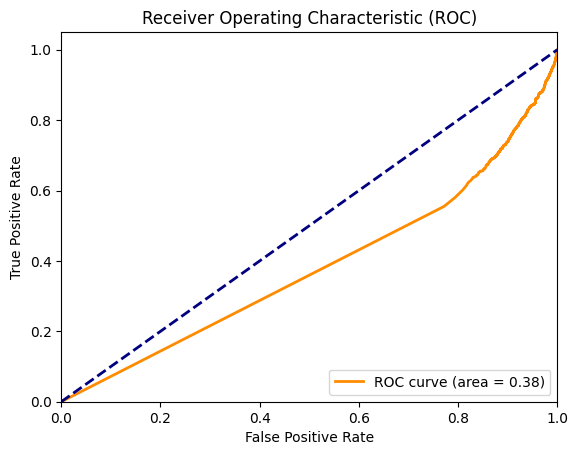

0.99999994 0.6083993370536216
 Classification report of the model: 
              precision    recall  f1-score   support

           0       0.19      0.45      0.26      1011
           1       0.92      0.77      0.84      8585

    accuracy                           0.74      9596
   macro avg       0.55      0.61      0.55      9596
weighted avg       0.84      0.74      0.78      9596



In [470]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = (best_model.predict(X_dev_reshaped))
fpr, tpr, thresholds = roc_curve(y_devel, y_pred_prob, pos_label=0)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

best_threshold = None
best_recall_macro = -1.0

for threshold in thresholds:
    y_pred_thresholded = (y_pred_prob > threshold).astype(int)
    recall_macro = recall_score(y_devel, y_pred_thresholded, average='macro')
    
    if recall_macro > best_recall_macro:
        best_recall_macro = recall_macro
        best_threshold = threshold



print(best_threshold,best_recall_macro)

# Step 6: Apply the optimal threshold to make predictions
y_pred_optimal = (y_pred_prob > best_threshold).astype(int)
print(" Classification report of the model: ")
print(classification_report(y_devel,y_pred_optimal))


In [245]:
def create_cnn_smote_model(filters, kernel_size, pool_size, hidden_layers, activation, optimizer, dropout_rate):
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation=activation, input_shape=(88, 1)))
    model.add(MaxPooling1D(pool_size=pool_size))
    model.add(Flatten())
    
    for units in hidden_layers:
        model.add(Dense(units, activation=activation))
        if dropout_rate > 0.0:
            model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    
    if optimizer == 'adam':
        optimizer = Adam()
    elif optimizer == 'rmsprop':
        optimizer = RMSprop()
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[tf.keras.metrics.F1Score(name='f1_score', average='macro')])
    return model

# Configurations
filters_variants = [32]
kernel_sizes = [3]
pool_sizes = [2]
hidden_layers_variants = [[64, 32], [128, 64]]
activations = ['relu', 'tanh']
optimizers = ['adam', 'rmsprop']
dropout_rates = [0.0, 0.2]

# Reshape y_train and y_val
y_train = y_train_smote.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)
X_train_np = X_train_smote.to_numpy()
X_val_np = X_val.to_numpy()
X_train_reshaped = X_train_np.reshape(-1, 88, 1)
X_val_reshaped = X_val_np.reshape(-1, 88, 1)

# Store the results
results = []

for filters in filters_variants:
    for kernel_size in kernel_sizes:
        for pool_size in pool_sizes:
            for hidden_layers in hidden_layers_variants:
                for activation in activations:
                    for optimizer in optimizers:
                        for dropout_rate in dropout_rates:
                            print(f'Training with filters={filters}, kernel_size={kernel_size}, pool_size={pool_size}, hidden_layers={hidden_layers}, activation={activation}, optimizer={optimizer}, dropout_rate={dropout_rate}')
                            model = create_cnn_model(filters=filters, kernel_size=kernel_size, pool_size=pool_size, hidden_layers=hidden_layers, activation=activation, optimizer=optimizer, dropout_rate=dropout_rate)
                            history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val), verbose=0)
                            
                            val_f1 = history.history['val_f1_score'][-1]
                            results.append((filters, kernel_size, pool_size, hidden_layers, activation, optimizer, dropout_rate, val_f1))

# Finding the best configuration
best_config = max(results, key=lambda x: x[7])
print(f'Best configuration: Filters={best_config[0]}, Kernel Size={best_config[1]}, Pool Size={best_config[2]}, Hidden Layers={best_config[3]}, Activation={best_config[4]}, Optimizer={best_config[5]}, Dropout Rate={best_config[6]}, Validation F1-Score={best_config[7]}')


Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=relu, optimizer=adam, dropout_rate=0.0
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=relu, optimizer=adam, dropout_rate=0.2
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.0
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=relu, optimizer=rmsprop, dropout_rate=0.2
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=tanh, optimizer=adam, dropout_rate=0.0
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=tanh, optimizer=adam, dropout_rate=0.2
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=tanh, optimizer=rmsprop, dropout_rate=0.0
Training with filters=32, kernel_size=3, pool_size=2, hidden_layers=[64, 32], activation=tanh, 

In [554]:
# Create the final model with the best configuration

best_model = create_cnn_smote_model(filters=best_config[0], kernel_size=best_config[1], pool_size=best_config[2], hidden_layers=best_config[3], activation=best_config[4],optimizer=best_config[5], dropout_rate=best_config[6])


X= np.concatenate((X_train_reshaped, X_val_reshaped), axis=0)
y= np.concatenate((y_train_smote, y_val), axis=0)
# Train the best model on the entire training set
best_model.fit(X, y, epochs=10, batch_size=32, verbose=0)



X_dev_np = normalized_dev_data.to_numpy()
y_devel = y_devel.reshape(-1, 1)
X_dev_reshaped = X_dev_np.reshape(-1, 88, 1)

# Predict on the test set
y_pred = (best_model.predict(X_dev_reshaped) > 0.5).astype(int)

accuracy = accuracy_score(y_devel, y_pred)
print(f'Test set accuracy: {accuracy}')

print(classification_report(y_devel, y_pred))

300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test set accuracy: 0.8842225927469779
              precision    recall  f1-score   support

           0       0.36      0.13      0.19      1011
           1       0.90      0.97      0.94      8585

    accuracy                           0.88      9596
   macro avg       0.63      0.55      0.57      9596
weighted avg       0.85      0.88      0.86      9596



300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
0.3679996451381916


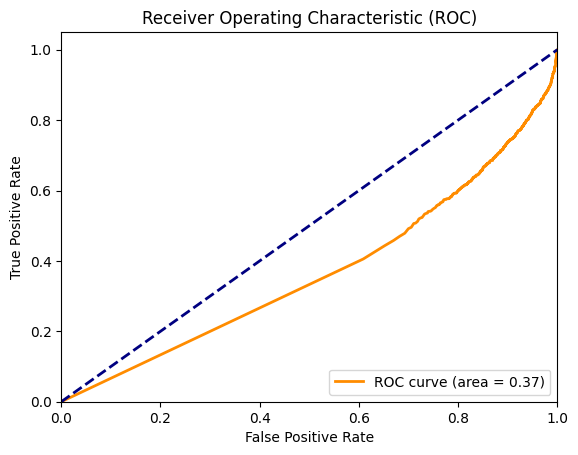

0.9999997 0.606934725589857
 Classification report of the model: 
              precision    recall  f1-score   support

           0       0.17      0.52      0.25      1011
           1       0.92      0.69      0.79      8585

    accuracy                           0.67      9596
   macro avg       0.55      0.61      0.52      9596
weighted avg       0.84      0.67      0.74      9596



In [555]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = (best_model.predict(X_dev_reshaped))
fpr, tpr, thresholds = roc_curve(y_devel, y_pred_prob, pos_label=0)
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

best_threshold = None
best_recall_macro = -1.0

for threshold in thresholds:
    y_pred_thresholded = (y_pred_prob > threshold).astype(int)
    recall_macro = recall_score(y_devel, y_pred_thresholded, average='macro')
    
    if recall_macro > best_recall_macro:
        best_recall_macro = recall_macro
        best_threshold = threshold



print(best_threshold,best_recall_macro)

# Step 6: Apply the optimal threshold to make predictions
y_pred_optimal = (y_pred_prob > best_threshold).astype(int)
print(" Classification report of the model: ")
print(classification_report(y_devel,y_pred_optimal))


## GENERALISABILITY TESTING

In [830]:
le.fit(['C', 'NC'])
y_train = le.transform(np.ravel(Training_labels))
y_devel = le.transform(np.ravel(Development_labels))

X_combined= np.concatenate((normalized_training_data, normalized_dev_data), axis=0)
y_combined = np.concatenate((y_train, y_devel), axis=0)


X_test=scaler.transform(Test_data)

selected SVM class weighting, DNN Class weighting and CNN class weighting

In [538]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_combined), y=y_combined)

# Train the final model with class weighting
final_model = SVC(**grid_search.best_params_, class_weight=dict(zip(np.unique(y_combined), class_weights)))
final_model.fit(X_combined, y_combined)


# Predict probabilities 
if hasattr(final_model, "predict_proba"):
    y_pred_prob = final_model.predict_proba(X_test)[:, 0]  
else:
    y_pred_prob = final_model.decision_function(X_test)  


y_pred_optimal = (y_pred_prob > 0.6370276561819047).astype(int)


In [539]:
y_pred_optimal

array([0, 0, 0, ..., 0, 1, 1])

In [540]:
le = preprocessing.LabelEncoder()
le.fit(['C', 'NC'])
Test_predictions = le.inverse_transform(np.ravel(y_pred_optimal))
Test_predictions = pd.DataFrame(Test_predictions)

Test_predictions.to_csv('Jhamb_Trial_1.csv', index=False, na_rep='NaN') 

In [541]:

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_combined), y=y_combined.ravel())
class_weights_dict = dict(enumerate(class_weights))


y_combined_ann = y_combined.reshape(-1, 1)

model = create_model(hidden_layers=[256, 128, 64], activation='relu', optimizer='rmsprop', dropout_rate=0.0)
history = model.fit(X_combined, y_combined_ann, epochs=10, batch_size=32, class_weight=class_weights_dict, verbose=0)

y_pred = (model.predict(X_test) > 0.9999798).astype(int)
Test_predictions = le.inverse_transform(np.ravel(y_pred))
Test_predictions = pd.DataFrame(Test_predictions)

Test_predictions.to_csv('Jhamb_Trial_2.csv', index=False, na_rep='NaN') 

c:\Users\anshi\Downloads\eGeMAPS\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step


In [556]:

y_combined = y_combined.reshape(-1, 1)
X_combined_cnn = X_combined.reshape(-1, 88, 1)

X_test_cnn = X_test.reshape(-1, 88, 1)


model = create_cnn_weight_model(filters=32, kernel_size=3, pool_size=2, hidden_layers=[128, 64], activation='relu', optimizer='adam', dropout_rate=0.0)
history = model.fit(X_combined_cnn, y_combined, epochs=10, batch_size=32, verbose=0, class_weight=class_weights_dict)
y_pred = (model.predict(X_test_cnn) > 0.99999994).astype(int)

Test_predictions = le.inverse_transform(np.ravel(y_pred))
Test_predictions = pd.DataFrame(Test_predictions)

Test_predictions.to_csv('Jhamb_Trial_3.csv', index=False, na_rep='NaN') 

c:\Users\anshi\Downloads\eGeMAPS\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


299/299 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [557]:
Test_predictions.shape

(9551, 1)

## SHAP

In [ ]:
%pip install shap

In [606]:
normalized_training_data.shape

(9505, 88)

In [635]:
#selecting 300 random rows to avoid computational costs 
random_indices = np.random.choice(normalized_training_data.index, 1000, replace=False)
background = normalized_training_data.loc[random_indices]
random_indices_2 = np.random.choice(normalized_dev_data.index, 100, replace=False)
background_dev=normalized_dev_data.loc[random_indices_2]

DNN

In [633]:
best_model.predict


<bound method TensorFlowTrainer.predict of <Sequential name=sequential_1469, built=True>>

In [636]:
import shap 
explainer = shap.KernelExplainer(best_model.predict, background)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Using 1000 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap_values = explainer.shap_values(background_dev, nsamples=100)


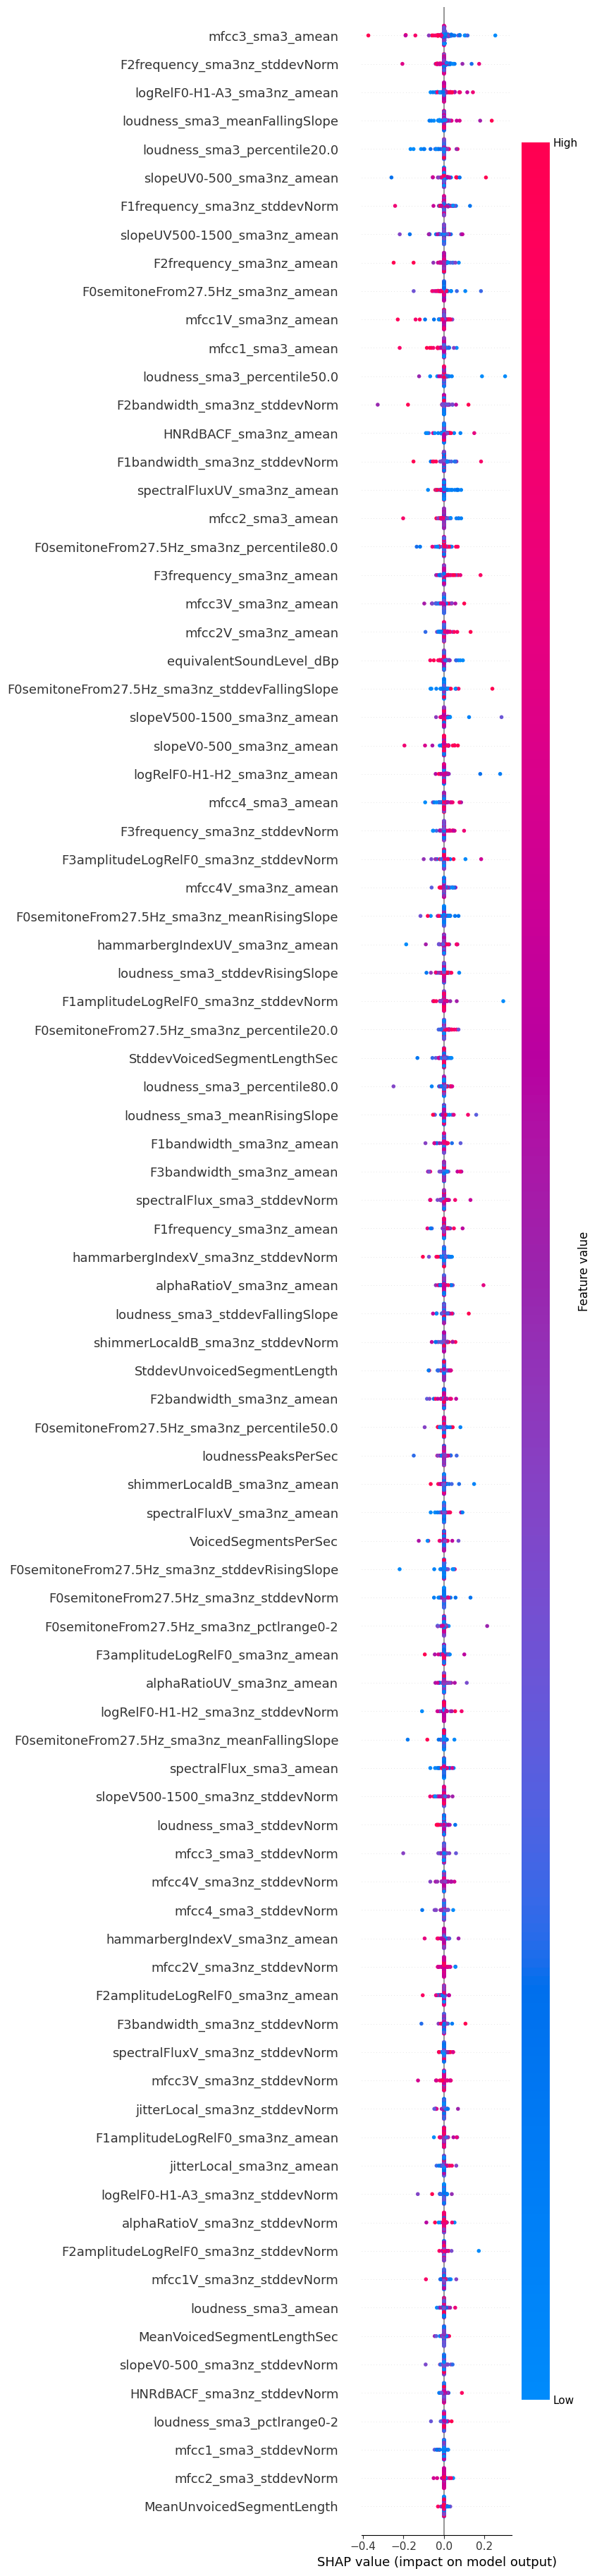

In [673]:
shap.summary_plot(shap_values[:,:,0], background_dev, max_display=background_dev.shape[1])


SVM

In [662]:
final_model.predict

<bound method BaseSVC.predict of SVC(C=1, class_weight={0: 4.899484536082475, 1: 0.5568248388986526},
    gamma='auto')>

In [671]:
explainer_2 = shap.KernelExplainer(final_model.predict, shap.kmeans(background,50))
shap_values_2 = explainer_2.shap_values(background_dev, nsamples=200)


100%|██████████| 100/100 [11:09<00:00,  6.69s/it]


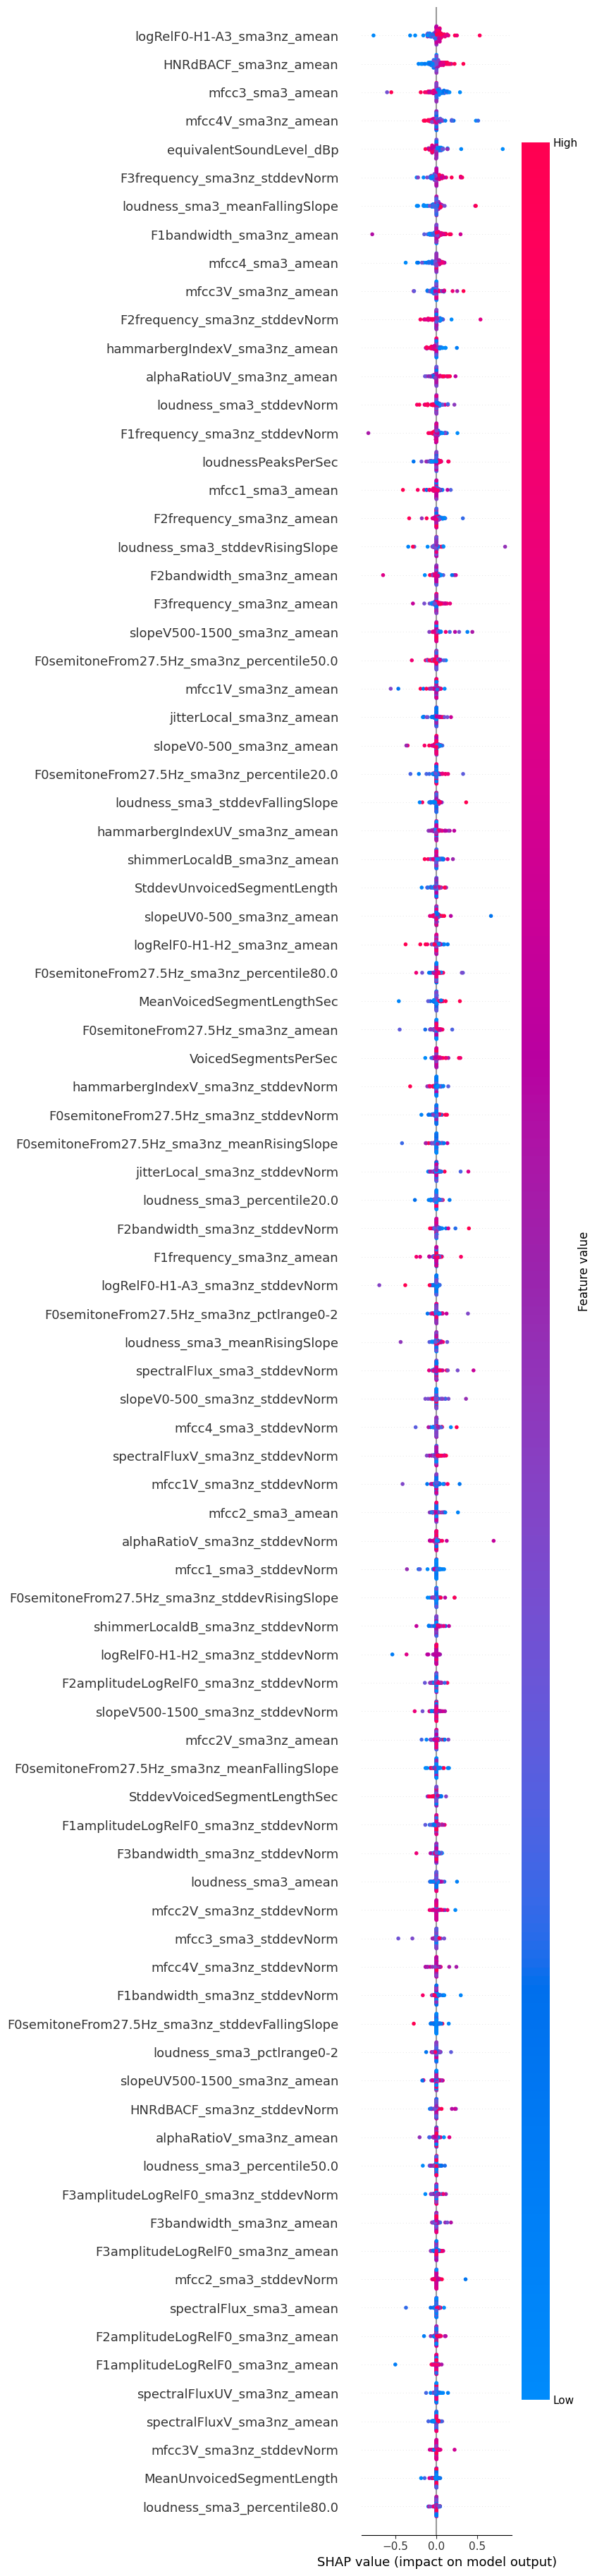

In [672]:
shap.summary_plot(shap_values_2, background_dev, max_display=background_dev.shape[1])


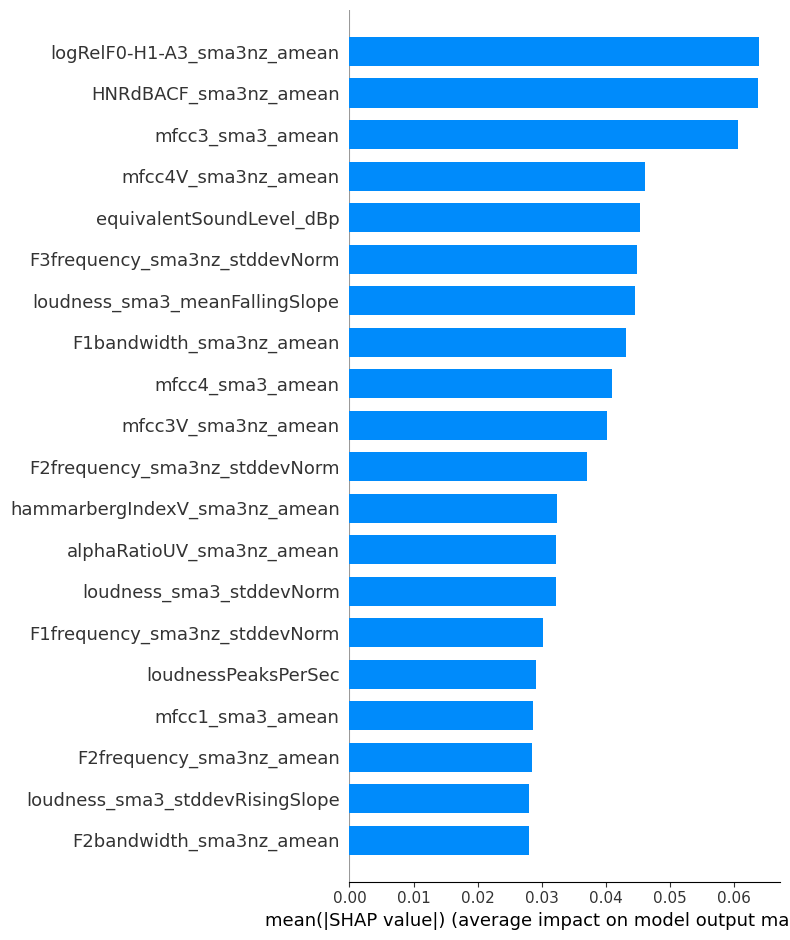

In [694]:
shap.summary_plot(shap_values_2, background_dev, plot_type="bar")


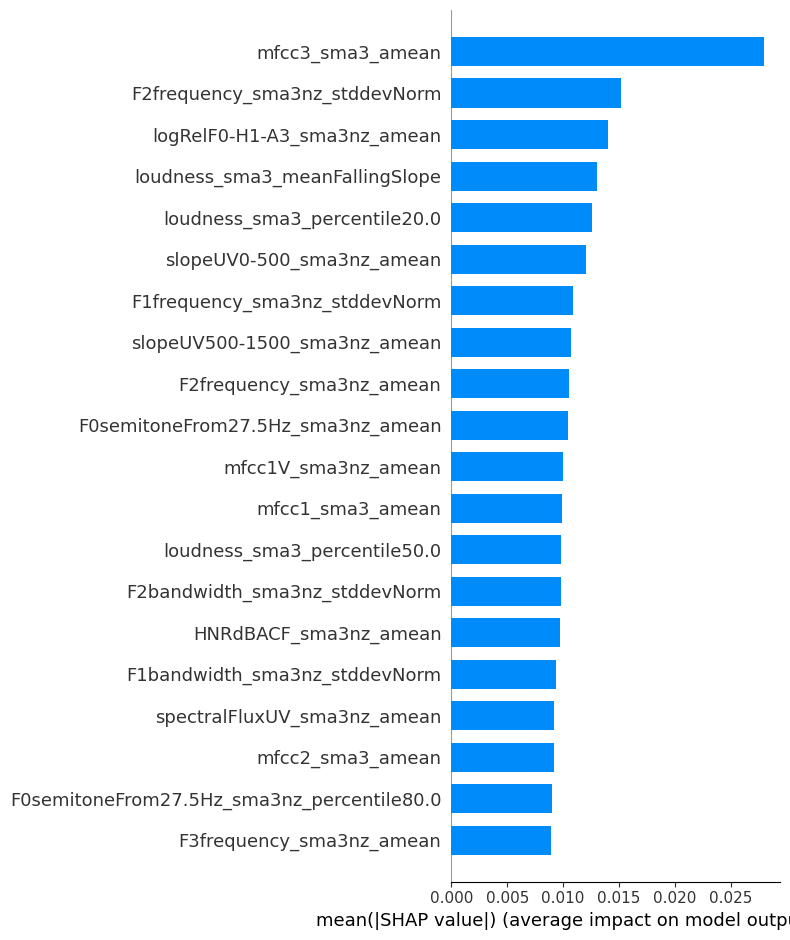

In [693]:
shap.summary_plot(shap_values[:,:,0], background_dev, plot_type="bar")



## GENDER BIAS 

In [790]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0)

selected_features = [
    'F0semitoneFrom27.5Hz_sma3nz_amean', #higher in women 
    'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', #higher in women 
    'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', #higher in women 
    'F0semitoneFrom27.5Hz_sma3nz_percentile80.0', #higher in women 
    'jitterLocal_sma3nz_amean', #higher in women 
    'F1frequency_sma3nz_amean',#higher in women 
    'F1bandwidth_sma3nz_amean',#higher in women 
    'F2frequency_sma3nz_amean',#higher in women 
    'F2bandwidth_sma3nz_amean',#higher in women 
    'F3frequency_sma3nz_amean',#higher in women 
    'F3bandwidth_sma3nz_amean',#higher in women 
    'loudness_sma3_amean',#higher in men 
]

# Extract the selected features from the DataFrame
X = normalized_dev_data[selected_features].values
# Fit the KMeans model to the data
kmeans.fit(X)

# Predict the cluster labels
cluster_labels = kmeans.labels_

# Analyze cluster characteristics 
cluster_centers = kmeans.cluster_centers_




In [792]:
cluster_centers

array([[-0.66401804, -0.63504337, -0.65364477, -0.65164059,  0.09626782,
        -0.41772586,  0.07276053, -0.32302701,  0.06900418, -0.16682353,
        -0.12844915,  0.23381493],
       [ 1.01104419,  0.96836795,  0.99449304,  1.01300545, -0.12237933,
         0.55548488,  0.04077873,  0.39761199, -0.15245169,  0.40568672,
         0.09576614, -0.2118408 ]])

In [ ]:

gender_labels = ['male' if i == 0 else 'female' for i in cluster_labels]

normalized_dev_data['predicted_gender'] = gender_labels

In [791]:
normalized_dev_data['predicted_gender']

0       female
1       female
2       female
3         male
4         male
         ...  
9591      male
9592      male
9593    female
9594    female
9595      male
Name: predicted_gender, Length: 9596, dtype: object

In [700]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


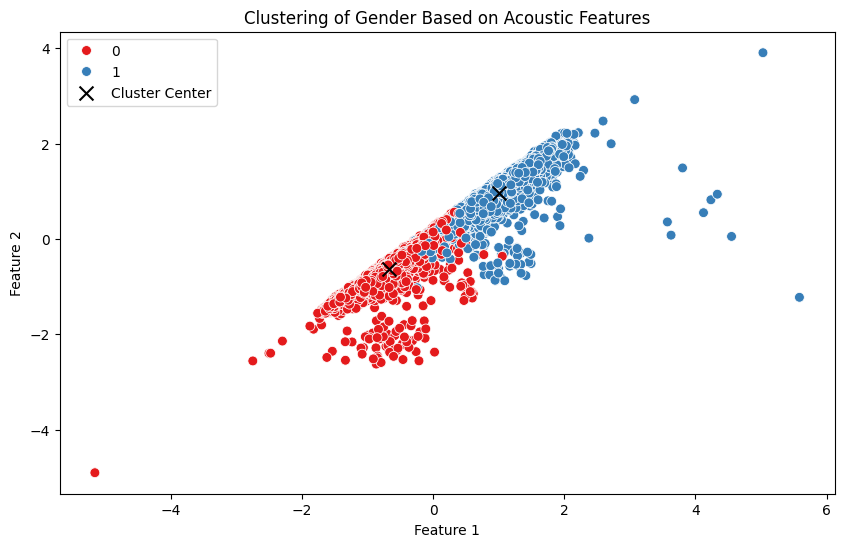

In [794]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting function without annotations
def plot_clusters(X, cluster_labels, cluster_centers):
    plt.figure(figsize=(10, 6))
    
    # Plot the clusters using the first two principal components (for visualization)
    sns.scatterplot(x=X[:, 2], y=X[:, 1], hue=cluster_labels, palette='Set1', legend='full', s=50)
    
    # Plot cluster centers
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='k', s=100, label='Cluster Center')
    
    plt.title('Clustering of Gender Based on Acoustic Features')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Assuming you already have computed cluster_labels and cluster_centers
plot_clusters(X, cluster_labels, cluster_centers)



In [817]:
male_data=normalized_dev_data[normalized_dev_data['predicted_gender']=='male']
male_data= male_data.drop(columns=['predicted_gender'])
male_label=y_devel[normalized_dev_data['predicted_gender']=='male']

In [818]:
female_data=normalized_dev_data[normalized_dev_data['predicted_gender']=='female']
female_data= female_data.drop(columns=['predicted_gender'])
female_label=y_devel[normalized_dev_data['predicted_gender']=='female']

In [840]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train.ravel())

final_model = SVC(**grid_search.best_params_, class_weight=dict(zip(np.unique(y_combined), class_weights)))
final_model.fit(normalized_training_data, y_train)


if hasattr(final_model, "predict_proba"):
    y_pred_prob = final_model.predict_proba(male_data)[:, 0]  # Probability of the positive class
else:
    y_pred_prob = final_model.decision_function(male_data)  # Decision function values (to be calibrated)


svm_male = (y_pred_prob > 0.6370276561819047).astype(int)

In [841]:
print('MALE:\n',classification_report(male_label,svm_male))


MALE:
               precision    recall  f1-score   support

           0       0.18      0.68      0.28       450
           1       0.96      0.73      0.83      5247

    accuracy                           0.72      5697
   macro avg       0.57      0.71      0.56      5697
weighted avg       0.90      0.72      0.79      5697



In [842]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train.ravel())

final_model = SVC(**grid_search.best_params_, class_weight=dict(zip(np.unique(y_combined), class_weights)))
final_model.fit(normalized_training_data, y_train)


if hasattr(final_model, "predict_proba"):
    y_pred_prob = final_model.predict_proba(female_data)[:, 0]
else:
    y_pred_prob = final_model.decision_function(female_data) 


svm_female = (y_pred_prob > 0.6370276561819047).astype(int)

In [843]:

print('FEMALE\n', classification_report(female_label,svm_female))

FEMALE
               precision    recall  f1-score   support

           0       0.19      0.49      0.27       561
           1       0.88      0.65      0.75      3338

    accuracy                           0.63      3899
   macro avg       0.54      0.57      0.51      3899
weighted avg       0.78      0.63      0.68      3899



ANN

In [829]:
y_train

array([0, 1, 1, ..., 1, 1, 1])

In [833]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train.ravel())
class_weights_dict = dict(enumerate(class_weights))


y_train_ann = y_train.reshape(-1, 1)

ann_model = create_model(hidden_layers=[256, 128, 64], activation='relu', optimizer='rmsprop', dropout_rate=0.0)
history = ann_model.fit(normalized_training_data, y_train_ann, epochs=10, batch_size=32, class_weight=class_weights_dict, verbose=0)

ann_male = (ann_model.predict(male_data) > 0.9999798).astype(int)

c:\Users\anshi\Downloads\eGeMAPS\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [837]:
print('MALE:\n',classification_report(male_label,ann_male))


MALE:
               precision    recall  f1-score   support

           0       0.09      0.97      0.16       450
           1       0.98      0.11      0.20      5247

    accuracy                           0.18      5697
   macro avg       0.53      0.54      0.18      5697
weighted avg       0.91      0.18      0.20      5697



In [835]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train.ravel())
class_weights_dict = dict(enumerate(class_weights))


y_train_ann = y_train.reshape(-1, 1)

ann_model = create_model(hidden_layers=[256, 128, 64], activation='relu', optimizer='rmsprop', dropout_rate=0.0)
history = ann_model.fit(normalized_training_data, y_train_ann, epochs=10, batch_size=32, class_weight=class_weights_dict, verbose=0)

ann_female = (ann_model.predict(female_data) > 0.9999798).astype(int)

c:\Users\anshi\Downloads\eGeMAPS\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [838]:
print('FEMALE:\n',classification_report(female_label,ann_female))


FEMALE:
               precision    recall  f1-score   support

           0       0.14      0.93      0.24       561
           1       0.80      0.05      0.09      3338

    accuracy                           0.17      3899
   macro avg       0.47      0.49      0.17      3899
weighted avg       0.71      0.17      0.11      3899



 CNN 

In [849]:
y_train = y_train.reshape(-1, 1)
normalized_training_data_np = normalized_training_data.to_numpy()  # Convert DataFrame to NumPy array
normalized_training_data_cnn = normalized_training_data_np.reshape(-1, 88, 1)  # Reshape for CNN

# Convert male_data to a NumPy array and reshape
male_data_np = male_data.to_numpy() # Convert DataFrame to NumPy array
male_data_cnn = male_data_np.reshape(-1, 88, 1)  # Reshape for CNN


model = create_cnn_weight_model(filters=32, kernel_size=3, pool_size=2, hidden_layers=[128, 64], activation='relu', optimizer='adam', dropout_rate=0.0)
history = model.fit(normalized_training_data_cnn, y_train, epochs=10, batch_size=32, verbose=0, class_weight=class_weights_dict)
cnn_male = (model.predict(male_data_cnn) > 0.99999994).astype(int)


c:\Users\anshi\Downloads\eGeMAPS\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [850]:
print('MALE:\n',classification_report(male_label,cnn_male))


MALE:
               precision    recall  f1-score   support

           0       0.08      0.98      0.15       450
           1       0.95      0.03      0.05      5247

    accuracy                           0.10      5697
   macro avg       0.52      0.51      0.10      5697
weighted avg       0.88      0.10      0.06      5697



In [851]:
y_train = y_train.reshape(-1, 1)
normalized_training_data_np = normalized_training_data.to_numpy()  # Convert DataFrame to NumPy array
normalized_training_data_cnn = normalized_training_data_np.reshape(-1, 88, 1)  # Reshape for CNN

# Convert male_data to a NumPy array and reshape
female_data_np = female_data.to_numpy() # Convert DataFrame to NumPy array
female_data_cnn = female_data_np.reshape(-1, 88, 1)  # Reshape for CNN


model = create_cnn_weight_model(filters=32, kernel_size=3, pool_size=2, hidden_layers=[128, 64], activation='relu', optimizer='adam', dropout_rate=0.0)
history = model.fit(normalized_training_data_cnn, y_train, epochs=10, batch_size=32, verbose=0, class_weight=class_weights_dict)
cnn_female = (model.predict(female_data_cnn) > 0.99999994).astype(int)

c:\Users\anshi\Downloads\eGeMAPS\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [852]:
print('FEMALE:\n',classification_report(female_label,cnn_female))


FEMALE:
               precision    recall  f1-score   support

           0       0.14      0.98      0.25       561
           1       0.65      0.01      0.01      3338

    accuracy                           0.15      3899
   macro avg       0.39      0.49      0.13      3899
weighted avg       0.57      0.15      0.05      3899

